In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

import cooler
import bioframe
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
import csv

In [5]:
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

bp_formatter = EngFormatter('b')

In [6]:
def Threeway_overlap(Peaks_lst):
    P = []
    for i in range(len(Peaks_lst)):
        x = Peaks_lst[i].iloc[:,0:4]
        x1 = x.rename(columns={0:'chrom', 1:'start', 2:'end',3:'peak_name'}, inplace=False)
        P.append(x1)
    ### A vs. B ###
    AB_df = bioframe.closest(df1=P[0],df2=P[1])
    A_and_B_df = AB_df[AB_df['distance']==0]
    
    BA_df = bioframe.closest(df1=P[1],df2=P[0])
    B_and_A_df = BA_df[BA_df['distance']==0]

#    print(len(A_and_B_df),len(B_and_A_df))
    AB = np.max([len(A_and_B_df),len(B_and_A_df)])
    AB_df_max = [A_and_B_df,B_and_A_df][np.argmax([len(A_and_B_df),len(B_and_A_df)])]


    ### A vs. C ###
    AC_df = bioframe.closest(df1=P[0],df2=P[2])
    A_and_C_df = AC_df[AC_df['distance']==0]
    
    CA_df = bioframe.closest(df1=P[2],df2=P[0])
    C_and_A_df = CA_df[CA_df['distance']==0]

#    print(len(A_and_C_df),len(C_and_A_df))
    AC = np.max([len(A_and_C_df),len(C_and_A_df)])
    AC_df_max = [A_and_C_df,C_and_A_df][np.argmax([len(A_and_C_df),len(C_and_A_df)])]

    ### B vs. C ###
    BC_df = bioframe.closest(df1=P[1],df2=P[2])
    B_and_C_df = BC_df[BC_df['distance']==0]
    
    CB_df = bioframe.closest(df1=P[2],df2=P[1])
    C_and_B_df = CB_df[CB_df['distance']==0]

#    print(len(B_and_C_df),len(C_and_B_df))
    BC = np.max([len(B_and_C_df),len(C_and_B_df)])
    BC_df_max = [B_and_C_df,C_and_B_df][np.argmax([len(B_and_C_df),len(C_and_B_df)])]

    ### 

    ### AB vs. C ###
    AB_df = AB_df_max.iloc[:,0:4].copy()
    AB_df.columns = ['chrom','start','end','peak_name']

    AB_C_df = bioframe.closest(df1=AB_df,df2=P[2])
    AB_and_C_df = AB_C_df[AB_C_df['distance']==0]
    
    C_AB_df = bioframe.closest(df1=P[2],df2=AB_df)
    C_and_AB_df = AB_C_df[AB_C_df['distance']==0]    


    
#    print(len(AB_and_C_df),len(C_and_AB_df))
    ABC = np.max([len(AB_and_C_df),len(C_and_AB_df)])

#    print('ABc+ABC=',AB)
#    print('AbC+ABC=',AC)
#    print('aBC+ABC=',BC)
    ABc=AB-ABC
    AbC=AC-ABC
    aBC=BC-ABC


    print('ABC=',ABC)
    print('ABc=',AB-ABC)
    print('AbC=',AC-ABC)
    print('aBC=',BC-ABC)
    A,B,C = len(P[0]),len(P[1]),len(P[2])    
    print('A:',A, 'B:',B, 'C: ', C)

    Abc=A-ABC-ABc-AbC
    aBc=B-ABC-ABc-aBC
    abC=C-ABC-AbC-aBC
    print(Abc,aBc,abC)


    return Abc,aBc,ABc,abC,AbC,aBC,ABC


In [13]:
# summits
smc1_ca1200_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_CA1200_1hrauxin_avg_JK159b_JK160b_chip_summits.bed')
smc1_jk05_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK05_1hrauxin_avg_JK157b_JK158b_chip_summits.bed')
smc1_jk06_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK06_1hrauxin_avg_JK161b_JK184b_chip_summits.bed')

smc3_ca1200_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_CA1200_1hrauxin_avg_JK165_JK166_chip_summits.bed')
smc3_jk05_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK05_1hrauxin_avg_JK163_JK164_chip_summits.bed')
smc3_jk06_s = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK06_1hrauxin_avg_JK167_JK185_chip_summits.bed')

nipbl_ca1200_s = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_CA1200_1hrauxin_avg_chip_summits.bed')
nipbl_jk05_s = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_JK05_1hrauxin_avg_chip_summits.bed')
nipbl_jk06_s = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_3/ChIP-seq/PQN85_JK06_1hrauxin_avg_chip_summits.bed')


# peaks
smc1_ca1200 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_CA1200_1hrauxin_avg_JK159b_JK160b_chip_peaks.bed')
smc1_jk05 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK05_1hrauxin_avg_JK157b_JK158b_chip_peaks.bed')
smc1_jk06 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK06_1hrauxin_avg_JK161b_JK184b_chip_peaks.bed')

smc3_ca1200 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_CA1200_1hrauxin_avg_JK165_JK166_chip_peaks.bed')
smc3_jk05 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK05_1hrauxin_avg_JK163_JK164_chip_peaks.bed')
smc3_jk06 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK06_1hrauxin_avg_JK167_JK185_chip_peaks.bed')

nipbl_ca1200 = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_CA1200_1hrauxin_avg_chip_peaks.bed')
nipbl_jk05 = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_JK05_1hrauxin_avg_chip_peaks.bed')
nipbl_jk06 = bioframe.read_table('/scratch/cgsb/ercan/GEO/GEO_cohesin_3/ChIP-seq/PQN85_JK06_1hrauxin_avg_chip_peaks.bed')


ABC= 6508
ABc= 247
AbC= 1300
aBC= 672
A: 8323 B: 7780 C:  11303
268 353 2823


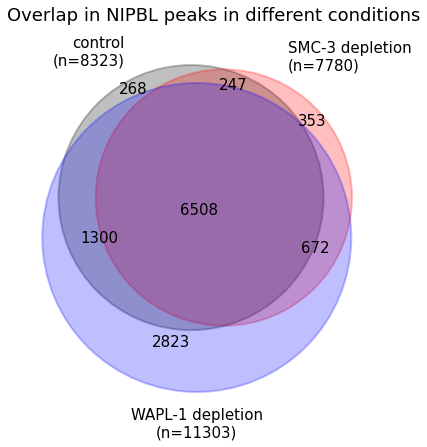

In [14]:
from matplotlib_venn import venn3,venn3_circles
### n peaks, center
f, axs = plt.subplots(
    figsize=(6, 6),
    nrows=1,
    ncols=1,
    sharey='row'
)

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
nipbl_P = [nipbl_ca1200,nipbl_jk05,nipbl_jk06]
a = Threeway_overlap(nipbl_P)

dat = a


c = venn3(ax=axs, subsets = dat,
      set_labels = ('control\n(n='+str(dat[0]+dat[2]+dat[4]+dat[6])+')',
                    'SMC-3 depletion\n(n='+str(dat[1]+dat[2]+dat[5]+dat[6])+')',
                    'WAPL-1 depletion\n(n='+str(dat[3]+dat[4]+dat[5]+dat[6])+')'),alpha=0)
circles = venn3_circles(ax=axs,subsets = dat)
for circle, color in zip(circles, ['black', 'red','blue']):
    circle.set_lw(2.0)

    circle.set_alpha(0.25)
    circle.set_color(color)
for text in c.set_labels:
    text.set_fontsize(15)
for text in c.subset_labels:
    text.set_fontsize(15)
f.text(0.5, 1, 'Overlap in NIPBL peaks in different conditions', ha='center',fontsize=18)
#f.text(0.73, 0.83, 'overlapping\nSMC-3 peaks', ha='center',fontsize=20)

plt.tight_layout()

In [15]:
################################ do differential peak analysis #############################

def get_unique_summits(Peaks_lst,Summits_lst):
    P = []
    for i in range(len(Peaks_lst)):
        x = Peaks_lst[i].iloc[:,0:4]
#        print(len(x))
        x1 = x.rename(columns={0:'chrom', 1:'start', 2:'end',3:'peak_name'}, inplace=False)
        P.append(x1)
    S = []
    for i in range(len(Summits_lst)):
        x = Summits_lst[i].iloc[:,0:4]
#        print(len(x))
        x1 = x.rename(columns={0:'chrom', 1:'start', 2:'end',3:'peak_name'}, inplace=False)
        S.append(x1)
        
    ### A unique ###
    df1 = bioframe.closest(df1=P[0],df2=P[1])
    df2 = bioframe.closest(df1=P[0],df2=P[2])
    A_bool = np.logical_and(df1['distance']>0, df2['distance']>0)
    A_unique = S[0][A_bool].reset_index(drop=True)

    ### B unique ###
    df1 = bioframe.closest(df1=P[1],df2=P[0])
    df2 = bioframe.closest(df1=P[1],df2=P[2])
    B_bool = np.logical_and(df1['distance']>0, df2['distance']>0)
    B_unique = S[1][B_bool].reset_index(drop=True)

    ### C unique ###
    df1 = bioframe.closest(df1=P[2],df2=P[0])
    df2 = bioframe.closest(df1=P[2],df2=P[1])
    C_bool = np.logical_and(df1['distance']>0, df2['distance']>0)
    C_unique = S[2][C_bool].reset_index(drop=True)
    return A_unique,B_unique,C_unique


In [16]:

nipbl_P = [nipbl_ca1200,nipbl_jk05,nipbl_jk06]
smc3_P = [smc3_ca1200,smc3_jk05,smc3_jk06]
smc1_P = [smc1_ca1200,smc1_jk05,smc1_jk06]

nipbl_S = [nipbl_ca1200_s,nipbl_jk05_s,nipbl_jk06_s]
smc3_S = [smc3_ca1200_s,smc3_jk05_s,smc3_jk06_s]
smc1_S = [smc1_ca1200_s,smc1_jk05_s,smc1_jk06_s]


unique_nipbl = get_unique_summits(nipbl_P,nipbl_S)
unique_smc3 = get_unique_summits(smc3_P,smc3_S)
unique_smc1 = get_unique_summits(smc1_P,smc1_S)

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

jets = bioframe.read_table('/home/kimj50/cohesin_paper/jets_call/jetcall_v5_w30kb.bed',schema='bed6')

jets['chrom'] = 'chr' + jets['chrom'] ### jets

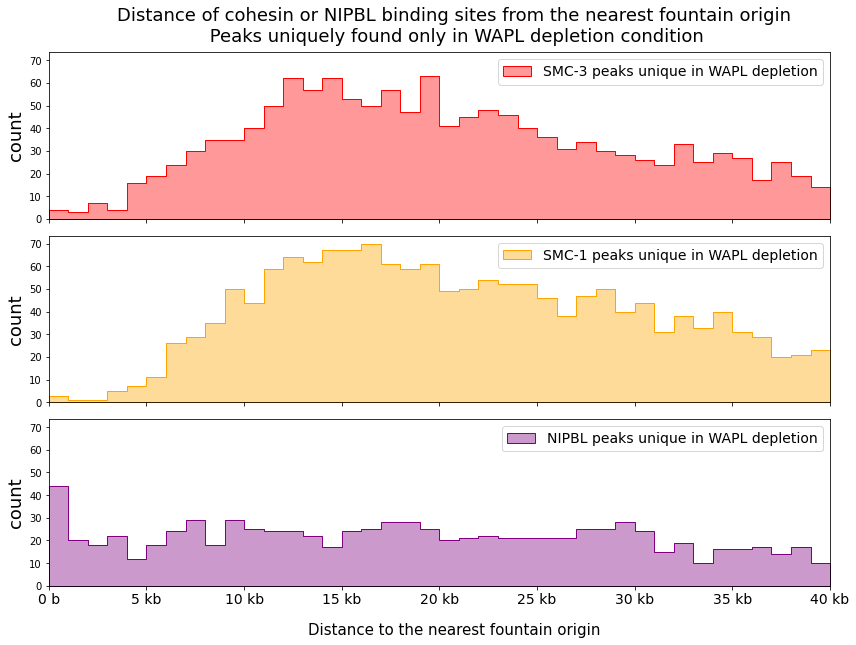

In [17]:
### n peaks, center
f, axs = plt.subplots(
    figsize=(12, 8),
    nrows=3,
    ncols=1,
    sharey=True,
    sharex=True
)


#Label_1 = 'Control'
#Label_2 = 'SMC-3 depletion'


Labels = ['SMC-3 peaks unique in WAPL depletion', 'SMC-1 peaks unique in WAPL depletion', 'NIPBL peaks unique in WAPL depletion']

Maxd = 40_000

dat = [unique_smc3[2],unique_smc1[2],unique_nipbl[2]]


colors = ['red','orange','purple']

for i in range(3):
    t = bioframe.closest(dat[i],jets)    
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[i],data = t2, kde = False, label=Labels[i],
                 stat = "count",color=colors[i],alpha=0.4,binwidth=1000,element='step')
    a.legend(prop={'size': 14})
    a.xaxis.set_tick_params(labelsize=14)
    a.set_ylabel('count' ,rotation=90,fontsize=18,labelpad=4)


a.set_xlabel('')
format_ticks(a,x=True,y=False,rotate=False)
a.set_xlim(0,40_000)



    
f.text(0.53,1,'Distance of cohesin or NIPBL binding sites from the nearest fountain origin\n Peaks uniquely found only in WAPL depletion condition',fontsize=18, ha='center')

f.text(0.53, -0.03, 'Distance to the nearest fountain origin', 
       ha='center',fontsize=15)

plt.tight_layout()    